In [3]:
pip install pyresparser

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3969 sha256=9ee8ff89a86eedb1baf7e4437108bd786ba58ec4e5c49c6c6e52907413e3b164
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\66\d7\77\4dc0e151e2ef19b5474722fd943e312603f10016baab494f7a
Successfully built docx2txt
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.2
    Uninstalling urllib3-1.24.2:
      Successfully uninstalled urllib3-1.24.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pdfminer.six

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.10-py3-none-any.whl size=184489 sha256=8d14a69e80b18927bf381e97e91018e92f50a1d5f8a084cf2a779bea0be6511f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\83\84\21\ca046018e83edef96581a58f9dde2ac3b0d2919d624f0663d9
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import textract
import docx
from docx import Document


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text
def extract_text_from_word(filepath):
    #Opens en reads in a .doc or .docx file from path
    
    txt = textract.process(filepath).decode('utf-8')
    return txt.replace('\n', ' ').replace('\t', ' ')

In [4]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install thinc --pre

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install jsonlines

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install docx2python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=f6730cab2865eb15c72d8d6b49112659803cdc5f58910d5dd3b192583e5c5279
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\c1\ca\d1\14e0dabe6f772bb5b45e006111268d943d4196fcb8798e3bf8
Successfully built pytesseract
Note: you may need to restart the kernel to use updated packages.


In [8]:
#extract text from an image
from PIL import Image
from pytesseract import pytesseract
  
# Defining paths to tesseract.exe
# and the image we would be using
def extract_text_from_image(image_path):
    path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    # Opening the image & storing it in an image object
    img = Image.open(image_path)
    # Providing the tesseract executable
    # location to pytesseract library
    pytesseract.tesseract_cmd = path_to_tesseract
    # Passing the image object to image_to_string() function
    # This function will extract the text from the image
    text = pytesseract.image_to_string(img)
    # Displaying the extracted text
    return(text[:-1])

In [71]:
pip install python-pptx

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Extract text from all pptx files
from pptx import Presentation
import glob
import io 
f = io.StringIO()
def extract_text_from_pptx(filepath):
#for eachfile in glob.glob("C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\*.pptx"):
    prs = Presentation(filepath)
    for slide in prs.slides:
        for shape in slide.shapes:
            if hasattr(shape, "text"):
                print((shape.text), file=f)
                # to get the value back
    a = f.getvalue()
    f.truncate(0)
    return a

In [8]:
import os    
def create_texts_list_from_pptx():
    '''Create two lists, one with the names of the candidate and one with the 
       resume texts extracted from either a .pdf, .doc or jpg and jpeg'''
    resume_pptx, resume_names_pptx = [], []
    
    # Loop over the contents of the directory containing the resumes, filtering by .pptx
    for root, dirs, resumes in os.walk('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV'):
        for resume in resumes:
            #some .doc(x) generates error so I ignored them via try except
            try:
                if resume.lower().endswith('.pptx'):
                    # Read in every resume with docx or doc extension in the directory
                    resume_pptx.append(extract_text_from_pptx('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\' + resume))
                    resume_names_pptx.append(resume.split('_')[0].capitalize())
            except Exception as err:
                print('error:', err)
        return resume_pptx, resume_names_pptx

In [9]:
resume_pptx, resume_names_pptx = create_texts_list_from_pptx()

In [2]:
#to display the whole text in a row
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [ ]:
# return the value
#result = df.loc['Row_id', 'Name']

In [2]:
import os    
def create_texts_list_from_word():
    '''Create two lists, one with the names of the candidate and one with the 
       resume texts extracted from .doc or docx'''
    resume_word_texts, resume_word_names = [], []
    
    # Loop over the contents of the directory containing the resumes, filtering by .pdf or .doc(x) or jpeg and jpg
    for root, dirs, resumes in os.walk('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV'):
        for resume in resumes:
            #some .doc(x) generates error so I ignored them via try except
            try:
                if resume.lower().endswith('.docx') or resume.lower().endswith('.doc'):
                    # Read in every resume with docx or doc extension in the directory
                    resume_word_texts.append(extract_text_from_word('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\' + resume))
                    resume_word_names.append(resume.split('_')[0].capitalize())      
            except Exception as err:
                print('error:', err)
        return resume_word_texts, resume_word_names

In [3]:
resume_word_texts, resume_word_names = create_texts_list_from_word()

error: The command `antiword C:\Users\dell\Dropbox\Mon PC (DESKTOP-BCRQN7H)\Desktop\PFE\CV\Ahmed Ncir-Technicien de Soudure.doc` failed with exit code 1
------------- stdout -------------
b''------------- stderr -------------
b"I can't find the name of your HOME directory\r\nC:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\Ahmed Ncir-Technicien de Soudure.doc is not a Word Document.\r\n"
error: Bad magic number for central directory


In [40]:
df_word.isnull().values.any()#to check NAN values in the dataframe

False

In [19]:
import os    
def create_texts_list_from_pdf():
    '''Create two lists, one with the names of the candidate and one with the 
       resume texts extracted from a .pdf'''
    resume_pdf_texts, resume_pdf_names = [], []
    
    # Loop over the contents of the directory containing the resumes, filtering by .pdf
    for root, dirs, resumes in os.walk('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV'):
        for resume in resumes:
            #try except to avoid errors
            try:
                if resume.lower().endswith('.pdf'):
                    # Read in every resume with pdf extension in the directory
                    resume_pdf_texts.append(convert_pdf_to_txt('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\' + resume))
                    resume_pdf_names.append(resume.split('_')[0].capitalize())
            except Exception as err:
                print('error:', err)
        return resume_pdf_texts, resume_pdf_names

In [20]:
resume_pdf_texts, resume_pdf_names = create_texts_list_from_pdf()

In [21]:
import pandas as pd
df_resume_texts_from_pdf = pd.DataFrame(resume_pdf_texts, columns = ['pdf_resume_text'])

In [22]:
df_resume_names_from_pdf = pd.DataFrame(resume_pdf_names, columns = ['pdf_resume_names'])

In [23]:
df_pdf = pd.concat([df_resume_names_from_pdf, df_resume_texts_from_pdf], axis=1)
df_pdf

pdf_resume_names  \
0                             210315 cv enercon-  nmc.pdf   
1                             4tls cv full stacik dev.pdf   
2                                       4tls cv scrum.pdf   
3                                                   Abbes   
4          Abdallah saidane-software engineer manager.pdf   
..                                                    ...   
706                              Yosra drissi-gestion.pdf   
707  Yosra hassen-software quality assurance engineer.pdf   
708                 Yossra antit-ingénieur multimédia.pdf   
709                               Zeineb bachouch (1).pdf   
710                                 Zoghdadi's resume.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [50]:
df_pdf.isnull().values.any()#to check NAN values in the dataframe

False

In [9]:
import os    
def create_texts_list_from_image():
    '''Create two lists, one with the names of the candidate and one with the 
       resume texts extracted from jpg and jpeg'''
    resume_image_texts, resume_image_names = [], []
    
    # Loop over the contents of the directory containing the resumes, filtering by .pdf or .doc(x) or jpeg and jpg
    for root, dirs, resumes in os.walk('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV'):
        for resume in resumes:
            #some .doc(x) generates error so I ignored them via try except
            try:
                if resume.lower().endswith('.jpg') or resume.lower().endswith('.jpeg'):
                    # Read in every resume with jpg or jpeg extension in the directory
                    resume_image_texts.append(extract_text_from_image('C:\\Users\\dell\\Dropbox\\Mon PC (DESKTOP-BCRQN7H)\\Desktop\\PFE\\CV\\' + resume))
                    resume_image_names.append(resume.split('_')[0].capitalize())
            except Exception as err:
                print('error:', err)
        return resume_image_texts, resume_image_names

In [10]:
resume_image_texts, resume_image_names = create_texts_list_from_image()

In [ ]:
nltk.download('stopwords')

In [44]:
df_pdf['Candidate email'] = df_pdf['pdf_resume_text'].str.extract(r'([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)', expand = True)

In [45]:
df_word['Candidate email'] = df_word['word_resume_text'].str.extract(r'([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)', expand = True)

In [19]:
df_image['Candidate email'] = df_image['resume_text'].str.extract(r'([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)', expand = True)

In [47]:
df_col_pptx['Candidate email'] = df_col_pptx['pptx_resume'].str.extract(r'([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)', expand = True)

In [48]:
#df_pdf['Candidate phone number'] = df_pdf['pdf_resume_text'].str.findall(r'([\+\(]?[1-9][0-9 -\(\)]{8,}[0-9])')
df_pdf['Candidate phone number'] = df_pdf['pdf_resume_text'].str.extract(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)', expand = True)

In [49]:
df_word['Candidate phone number'] = df_word['word_resume_text'].str.extract(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)', expand = True)

In [20]:
df_image['Candidate phone number'] = df_image['resume_text'].str.extract(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)', expand = True)

In [51]:
#df_col_pptx['Candidate phone number'] = df_col_pptx['pptx_resume'].str.extract(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)', expand = True)
df_col_pptx['Candidate phone number'] = df_col_pptx['pptx_resume'].str.extract(r'([\+\(]?[0-9][0-9 -\(\)]{8,}[0-9])', expand = True)

# In this section we will try to identify the most appropriate library that can detect the language of a text 

In [51]:
pip install langid

  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941189 sha256=594acd17abc083784c27c6edb21f35741ae5c7a1f5c106ba09f05e99f9830a07
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\b4\77\b4\b38806c8087e0860cfeabab1f96b60c48346d8db59a9254787
Successfully built langid
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993190 sha256=4caa041a68460e1f64413e01e73a7b38771f898d454c710a003e1ffcf8e7b25b
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\53\88\5d\b239dc55d773b01fdd2059606b1a8f4b64548848b8f6e381c3
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [13]:
import langid # language identification (i.e. what language is this?)

In [20]:
# summerize the labelled language
df_col_pptx['pptx_resume'].apply(langid.classify)

0     (en, -1501.646155834198)
1     (en, -5576.032014131546)
2    (fr, -396.66236305236816)
Name: pptx_resume, dtype: object

In [2]:
#Conclusion: LangID does...alright, with three out of three pptx texts identified correctly

In [3]:
# summerize the labelled language
df_image['image_resume_text'].apply(langid.classify)

NameError: name 'df_image' is not defined

In [ ]:
#Conclusion: LangID does...alright, with four out of four image texts identified correctly

In [22]:
#OSError: classify.textcat requires the regex module that supports unicode. Try '$ pip install regex' and see https://pypi.python.org/pypi/regex for further details.
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [3]:
'''LookupError: 
**********************************************************************
  Resource crubadan not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('crubadan')'''
import nltk
nltk.download('crubadan')

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\crubadan.zip.


True

In [53]:
from nltk.classify.textcat import TextCat # language identification from NLTK
# N-Gram-Based Text Categorization
tc = TextCat()
# try to identify the languages of the first five tweets again
df_col_pptx['pptx_resume'].apply(tc.guess_language)

0    eng
1    eng
2    sun
Name: pptx_resume, dtype: object

In [ ]:
#TextCat got two out of three pptx texts correct

In [57]:
from nltk.classify.textcat import TextCat # language identification from NLTK
# N-Gram-Based Text Categorization
tc = TextCat()
# try to identify the languages of the first five tweets again
df_image['image_resume_text'].apply(tc.guess_language)

0    sun
1    eng
2    eng
3    fra
Name: image_resume_text, dtype: object

In [ ]:
#TextCat got three out of four image texts correct

In [67]:
import langid # language identification (i.e. what language is this?)
# get the language id for each text
#ids_langid = result['resume_text'].apply(langid.classify)
ids_langid = df_word['cleaned_resume_for_skills'].apply(langid.classify)
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])
langs

0     fr
1     fr
2     fr
3     en
4     fr
      ..
81    fr
82    fr
83    fr
84    fr
85    fr
Name: cleaned_resume_for_skills, Length: 86, dtype: object

In [15]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)
# count the number of times we see each language
langs_count = langs_df.resume_text.value_counts()

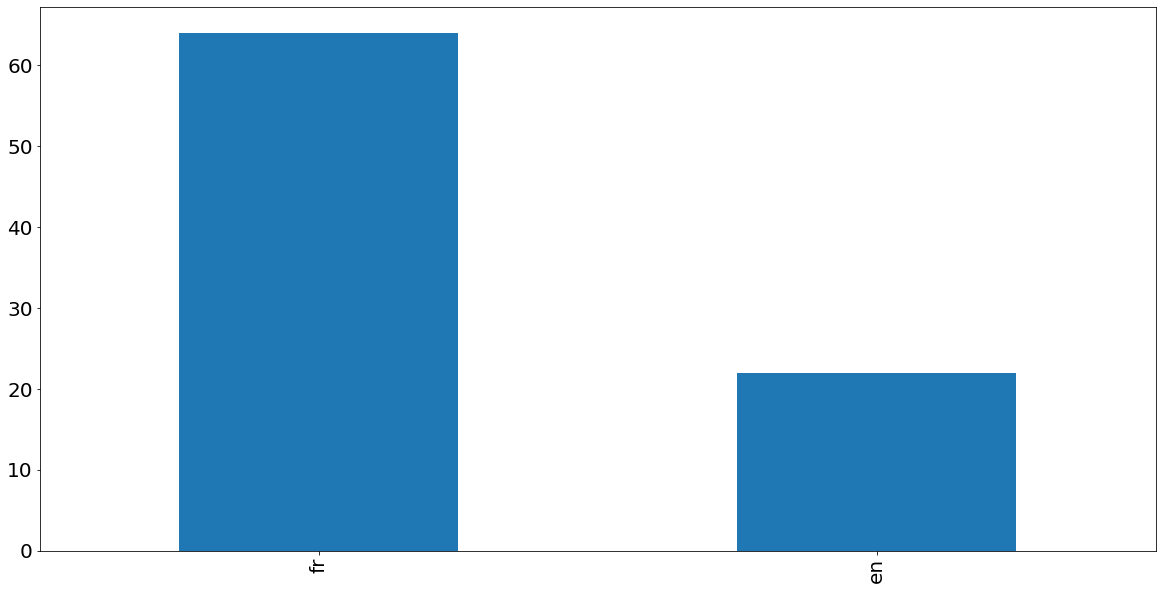

In [17]:
# Let's check out the distribution data across languages in our dataframe.
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [4]:
pip install -U spacy

^C
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --user en_core_web_sm

  Using cached spacy-2.3.5-cp36-cp36m-win_amd64.whl (9.5 MB)
  Using cached srsly-1.0.5-cp36-cp36m-win_amd64.whl (176 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached thinc-7.4.5-cp36-cp36m-win_amd64.whl (889 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy-nightly 3.0.0rc5 requires catalogue<2.1.0,>=2.0.1, but you have catalogue 1.0.0 which is incompatible.
spacy-nightly 3.0.0rc5 requires srsly<3.0.0,>=2.3.0, but you have srsly 1.0.5 which is incompatible.
spacy-nightly 3.0.0rc5 requires thinc<8.1.0,>=8.0.0, but you have thinc 7.4.5 which is incompatible.


In [1]:
pip install fr_core_news_sm

^C
Note: you may need to restart the kernel to use updated packages.


In [80]:
#Data cleaning
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"$%()*,-./:;<=>?@[\]_{|}~"""), ' ', resumeText)  # remove punctuations
    #resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [82]:
from nltk.corpus import stopwords
# This way, you've got the english and french stop words in the oneSetOfStopWords variable
stopwords = set(stopwords.words('english')) | set(stopwords.words('french'))
df_resume_texts_from_word['cleaned_resume'] = df_resume_texts_from_word.resume_text.apply(lambda x: cleanResume(x))
df_resume_texts_from_word['cleaned_resume'] = df_resume_texts_from_word['cleaned_resume'].str.lower().apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))

In [11]:
import langid # language identification (i.e. what language is this?)
# get the language id for each text
#ids_langid = result['resume_text'].apply(langid.classify)
ids_langid = df_resume_texts_from_word['resume_text'].apply(langid.classify)
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

In [84]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import spacy
import numpy as np
# Load pre-trained english and french language models
nlp_fr = spacy.load("fr_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")
Sentences = df_resume_texts_from_word['resume_text'].values
cleanedSentences = ""
df_resume_texts_from_word['Tokenised_text'] = ""
for i in range(0,86):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    if langid.classify(cleanedSentences)[0] == 'en':
        #requiredWords = nlp_en(cleanedText)
        df_resume_texts_from_word['Tokenised_text'] = df_resume_texts_from_word['cleaned_resume'].apply(nlp_en)
    elif langid.classify(cleanedSentences)[0] == 'fr':
        #requiredWords = nlp_fr(cleanedText)
        df_resume_texts_from_word['Tokenised_text'] = df_resume_texts_from_word['cleaned_resume'].apply(nlp_fr)

In [86]:
#create bigrams
df_resume_texts_from_word['bigrams'] = df_resume_texts_from_word['Tokenised_text'].apply(lambda row: list(nltk.bigrams(row)))